Calculating statistics for the CRTS QSO that are longer than 10 lines, that were extracted from  QSO_CRTS.tar, to ~/Desktop/SDSS/QSO_CRTS_LC_longer_10   ( code below based on qso_lc_stats.py) 

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from os import listdir

In [2]:
pwd

u'/astro/users/suberlak/Desktop/SDSS'

In [18]:
directory = 'QSO_CRTS_LC_longer_10/'

In [12]:

lc_stat_files = np.array(listdir(dir))

In [17]:
# make an array for storing total timespan of obs per object, 
# as well as the total number of nights per object
#nobs_object = np.zeros_like(lc_stat_files, dtype=float) # store how many nights per object
timespan_obs = np.zeros_like(lc_stat_files, dtype=float) # store what was the total  timespan of observations per object
lc_length=np.zeros_like(lc_stat_files, dtype=float)
avg_N_day = np.zeros_like(lc_stat_files, dtype=float)
avg_mag_ttl= np.zeros_like(lc_stat_files, dtype=float)
avg_err_ttl= np.zeros_like(lc_stat_files, dtype=float)
avg_mjd_diff= np.zeros_like(lc_stat_files, dtype=float)
mean_time_betw_obs = np.zeros_like(lc_stat_files, dtype=float)

In [ ]:
# Loop over the files to get all the values from each file... 

In [38]:
for i in range(len(lc_stat_files)):
    address=directory+lc_stat_files[i]  
    data=np.loadtxt(address)     
    lc_length[i] = sum(1 for line in open(address))
    avg_mag_ttl[i] = np.mean(data[:,1])
    avg_err_ttl[i] = np.mean(data[:,2])
    
    timespan_obs[i] = data[-1,0]-data[0,0]  # gives number of days between first and last obs
    
    
    # the 
    mjd_diff = np.zeros(len(data[:,0]))
    for j in range(len(data)-1):
        mjd_diff[j] = data[j+1,0] - data[j,0]
    avg_mjd_diff[i] = np.mean(mjd_diff)     # avg span between obs in MJD      


In [41]:
%matplotlib inline

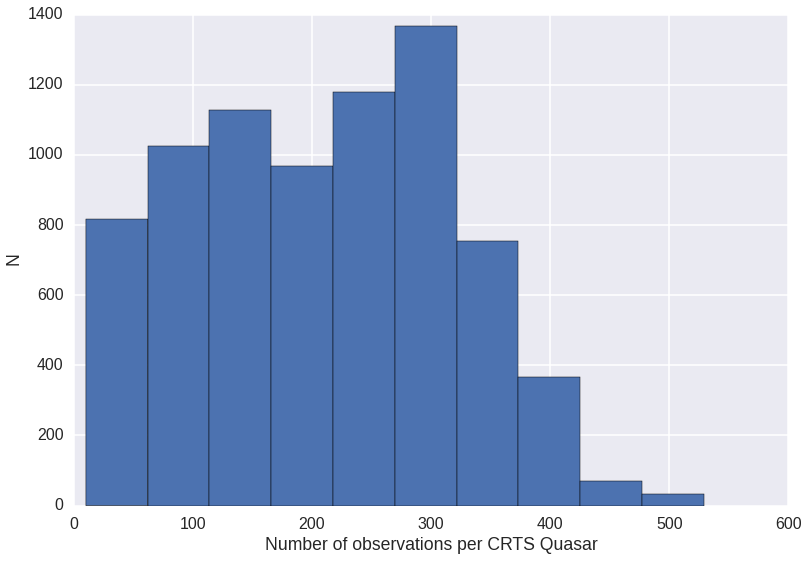

In [77]:
import seaborn as sns
sns.set_context('poster')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('N')
ax.set_xlabel('Number of observations per CRTS Quasar')
ax.hist(lc_length)
plt.savefig('QSO_CRTS_stats_lc_length.png')

In [76]:
# What is the mean number of observation points per Quasar ? 
print(np.mean(lc_length))

208.657584015


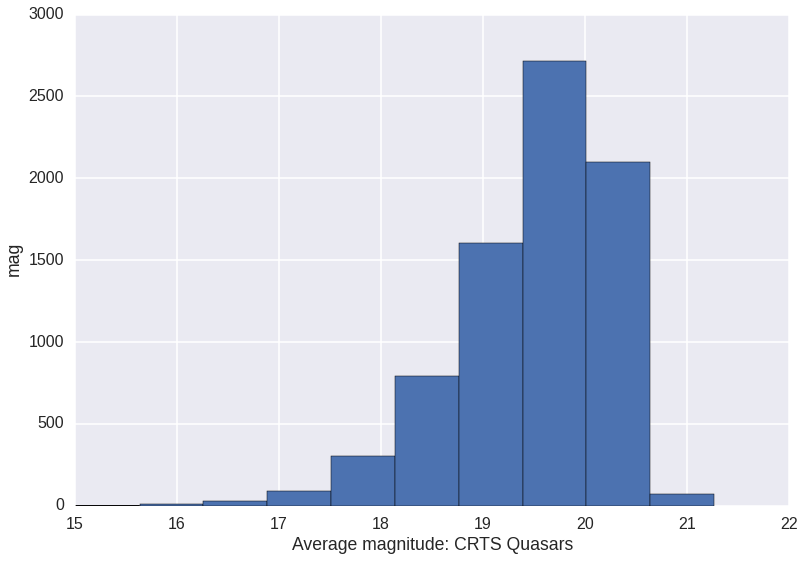

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('mag')
ax.set_xlabel('Average magnitude: CRTS Quasars')
ax.hist(avg_mag_ttl)
plt.savefig('QSO_CRTS_stats_avg_mag.png')

In [75]:
# What is the mean and median magnitude ? 
print(np.mean(avg_mag_ttl))
print(np.median(avg_mag_ttl))

19.5065692892
19.6611904762


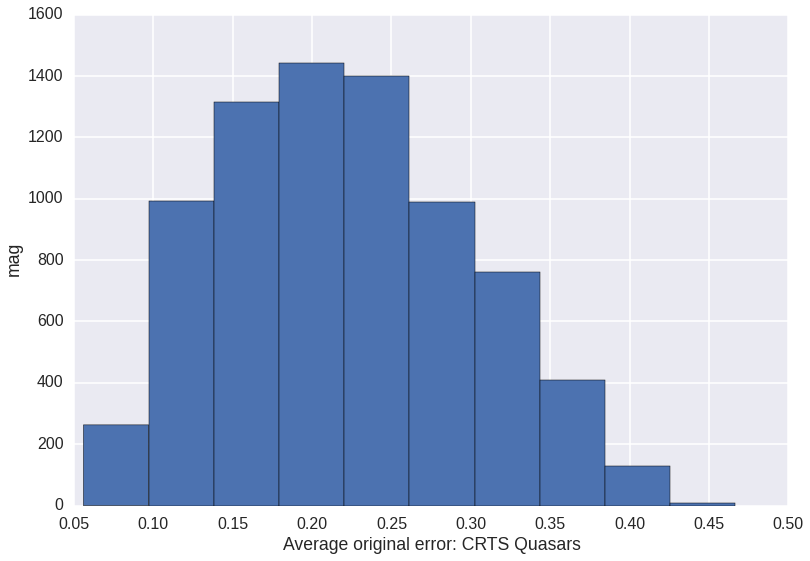

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('mag')
ax.set_xlabel('Average original error: CRTS Quasars')
ax.hist(avg_err_ttl)
plt.savefig('QSO_CRTS_stats_avg_err.png')

In [74]:
# What is the median CRTS error and mean
print np.mean(avg_err_ttl)
print np.median(avg_err_ttl)

0.220691330566
0.216234939759


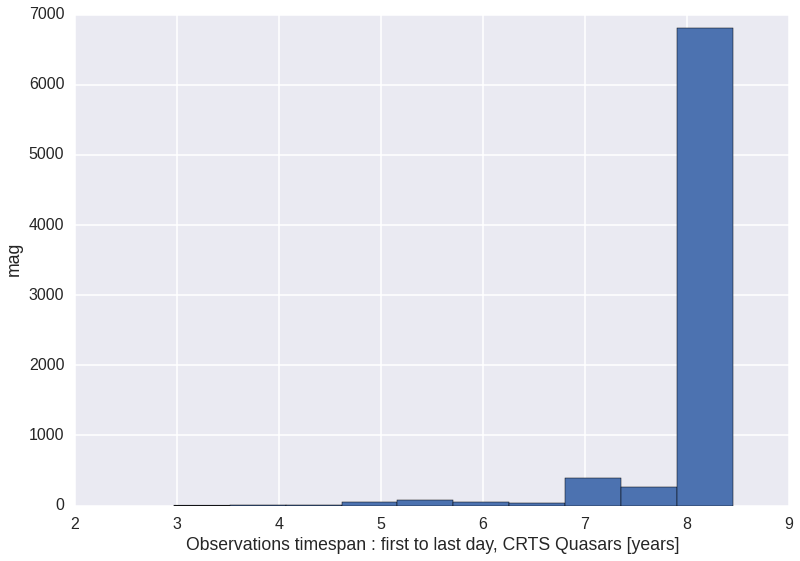

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('mag')
ax.set_xlabel('Observations timespan : first to last day, CRTS Quasars [years]')
ax.hist(timespan_obs / 365.0)
plt.savefig('QSO_CRTS_stats_obs_timespan.png')


In [73]:
# What percentage of observations of quasars span the period of more than 7 years 
np.sum(timespan_obs > 7*365) / float(len(timespan_obs))

0.96120410016867786

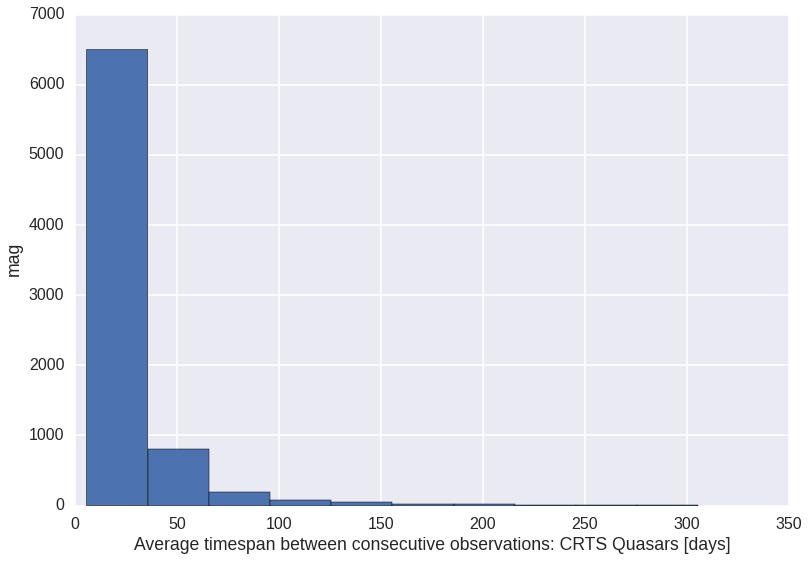

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('mag')
ax.set_xlabel('Average timespan between consecutive observations: CRTS Quasars [days]')
ax.hist(avg_mjd_diff)
plt.savefig('QSO_CRTS_stats_observations_cadence.png')